# CREDIT RISK PREDICTION

In [183]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Input , Dropout , BatchNormalization
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [51]:
#Loading the dataframe
df = pd.read_csv('Credit_risk.csv')

In [52]:
df.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   object 
 15  Education_type   9709 non-null   object 
 16  Family_status    9709 non-null   object 
 17  Housing_type  

In [55]:
#Transforming the columns having string values to integer values using LabelEncoder
le = LabelEncoder()

column_names = df.select_dtypes(include = 'object').columns
for column in column_names:
    df[column] = le.fit_transform(df[column])

In [56]:
df.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,4,1,0,4,12,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,4,4,1,1,17,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,0,4,3,1,15,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,1,1,2,1,12,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,4,1,1,1,0,0


In [57]:
df.drop('ID', axis=1, inplace=True)

In [58]:
df.head()

,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,4,1,0,4,12,1
1,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,4,4,1,1,17,0
2,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,0,4,3,1,15,0
3,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,1,1,2,1,12,0
4,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,4,1,1,1,0,0


In [17]:
df['Target'].value_counts()

Target
0    8426
1    1283
Name: count, dtype: int64

### DATA VISUALIZATION

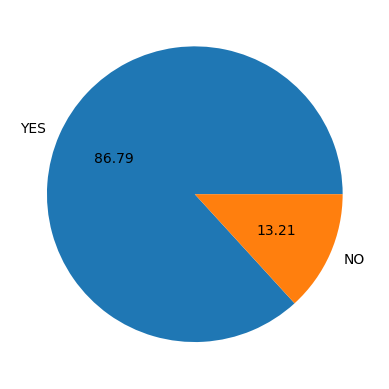

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(), labels=['YES','NO'], autopct="%0.2f")#autopct shows us percentage
plt.show()

<Axes: xlabel='Total_income', ylabel='Age'>

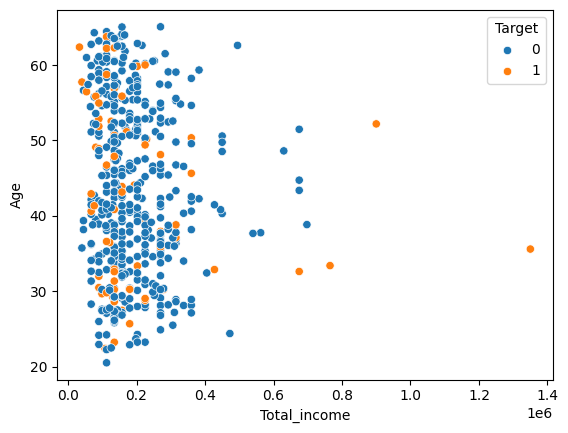

In [19]:
import seaborn as sns
sns.scatterplot(df, x=df['Total_income'].iloc[:500], y=df['Age'].iloc[:500], hue=df['Target'])

<Axes: >

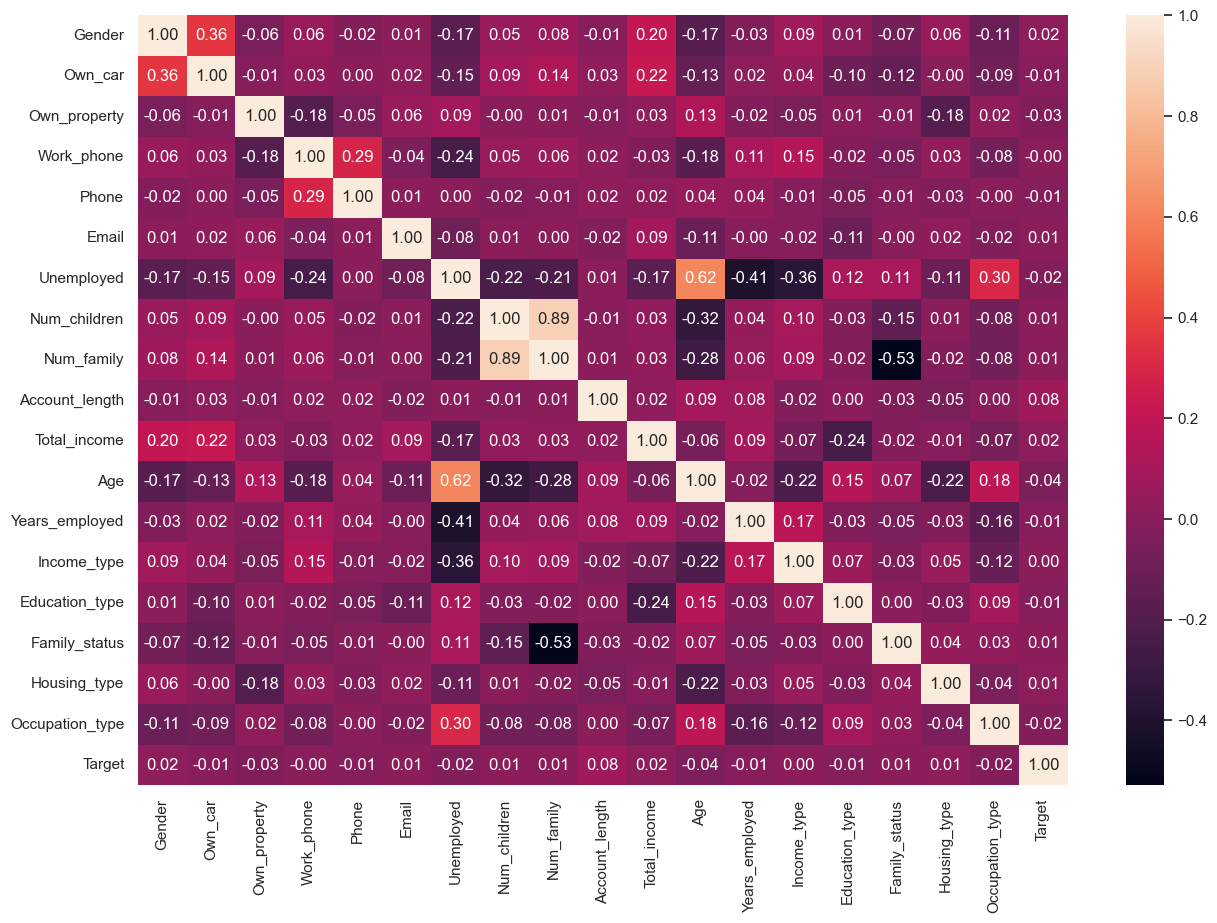

In [59]:
sns.set_theme(rc={'figure.figsize':(15,10)})
#finding correlation between features using heatmap
sns.heatmap(df.corr(), annot=True , fmt = '.2f')

### SPLITTING THE DATASET INTO TRAIN AND TEST SET

In [678]:
X = df.drop('Target', axis=1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = df['Target']

In [679]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True)
X_train , X_val , y_train , y_val = train_test_split(X_train , y_train , test_size=0.2 , shuffle = True)

### MODEL TRAINING USING NEURAL NETWORKS(2 hidden layers are there)

In [687]:
model = Sequential()

model.add(Input(shape = (18,)))
model.add(Dense(512, activation='elu' , kernel_initializer = 'he_normal' ,kernel_regularizer = 'l2'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='elu' , kernel_initializer = 'he_normal' ,kernel_regularizer = 'l2'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='elu' , kernel_initializer = 'he_normal' ,kernel_regularizer = 'l2'))
model.add(Dense(128, activation='elu'))
model.add(Dense(64, activation='elu'))
model.add(Dense(1, activation='sigmoid'))

In [688]:
model.summary()

Model: "sequential_123"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_655 (Dense)               │ (None, 512)            │         9,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_200 (Dropout)           │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_656 (Dense)               │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_201 (Dropout)           │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_657 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_658 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_659 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_660 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 444,929 (1.70 MB)

 Trainable params: 444,929 (1.70 MB)

 Non-trainable params: 0 (0.00 B)

In [689]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [690]:
EPOCHS = 50
BATCH_SIZE = len(X_train) // EPOCHS
Early_Stopping = tf.keras.callbacks.EarlyStopping(patience = 15 , restore_best_weights = True)
history = model.fit(X_train, y_train , validation_data = [X_val , y_val] , batch_size = BATCH_SIZE , epochs = EPOCHS , callbacks = [Early_Stopping])

Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8124 - loss: 6.8938 - val_accuracy: 0.8726 - val_loss: 1.7919
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8603 - loss: 1.3190 - val_accuracy: 0.8726 - val_loss: 0.5456
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8636 - loss: 0.5137 - val_accuracy: 0.8726 - val_loss: 0.4079
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8620 - loss: 0.4211 - val_accuracy: 0.8726 - val_loss: 0.3924
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8625 - loss: 0.4066 - val_accuracy: 0.8726 - val_loss: 0.3845
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8652 - loss: 0.3978 - val_accuracy: 0.8726 - val_loss: 0.3853
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8661 - loss: 0.3960 - val_accuracy: 0.8726 - val_loss: 0.3824
Epoch 8/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8590 - loss: 0.4102 - val_accuracy: 0.8726 - val_loss:

### MODEL EVALUATION(ACCURACY - 87.02%)

<Axes: >

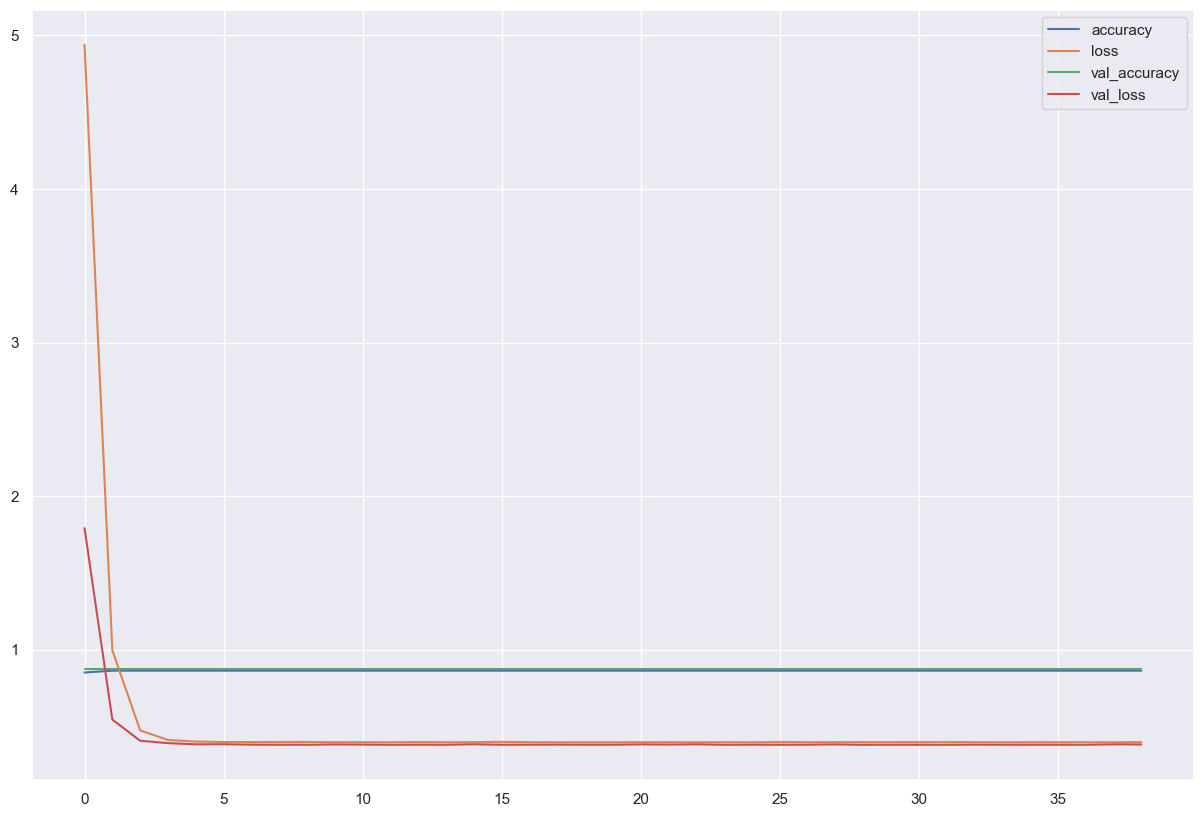

In [691]:
pd.DataFrame(history.history).plot()

In [692]:
model.evaluate(X_test , y_test)

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8705 - loss: 0.3855


[0.37404555082321167, 0.8764160871505737]